<a href="https://colab.research.google.com/github/SolAtomizer/Portfolio/blob/main/FuelConsumptionRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fuel Consumption Regression
### Estimating Fuel Consumption for different car models
Author: https://github.com/SolAtomizer

## Initiating Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#https://www.kaggle.com/datasets/rinichristy/2022-fuel-consumption-ratings
df = pd.read_csv('MY2022 Fuel Consumption Ratings.csv')

### Initial Exploration and Cleaning

In [3]:
#Small overview of the dataset's contents.
df.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [4]:
#Verifying missing values
df.isna().sum()

Model Year                           0
Make                                 0
Model                                0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Transmission                         0
Fuel Type                            0
Fuel Consumption (City (L/100 km)    0
Fuel Consumption(Hwy (L/100 km))     0
Fuel Consumption(Comb (L/100 km))    0
Fuel Consumption(Comb (mpg))         0
CO2 Emissions(g/km)                  0
CO2 Rating                           0
Smog Rating                          0
dtype: int64

In [5]:
#Veryfying duplicates
len(df[df.duplicated()])

0

In [6]:
#Verifying numerical values.
df.describe()

,Model Year,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
count,946.0,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000,946.000000
mean,2022.0,3.198732,5.668076,12.506448,9.363319,11.092072,27.247357,259.172304,4.539112,4.950317
std,0.0,1.374814,1.932670,3.452043,2.285125,2.876276,7.685217,64.443149,1.471799,1.679842
min,2022.0,1.200000,3.000000,4.000000,3.900000,4.000000,11.000000,94.000000,1.000000,1.000000
25%,2022.0,2.000000,4.000000,10.200000,7.700000,9.100000,22.000000,213.250000,3.000000,3.000000
50%,2022.0,3.000000,6.000000,12.200000,9.200000,10.800000,26.000000,257.000000,5.000000,5.000000
75%,2022.0,3.800000,6.000000,14.700000,10.700000,12.900000,31.000000,300.750000,5.000000,6.000000
max,2022.0,8.000000,16.000000,30.300000,20.900000,26.100000,71.000000,608.000000,10.000000,7.000000


In [7]:
#Dropping Model Year column, since all observations in the dataset are 2022.
df.drop(['Model Year'],axis=1,inplace=True)

In [8]:
#Some cars seem to have very high fuel consumption. Let's verify the data.
#Being super sports cars (Bugatti), the data seems correct and is kept.
df[df['Fuel Consumption(Comb (L/100 km))']>=25]

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
133,Bugatti,Chiron Pur Sport,Two-seater,8.0,16,AM7,Z,30.3,20.9,26.1,11,608,1,1
134,Bugatti,Chiron Super Sport,Two-seater,8.0,16,AM7,Z,30.3,20.9,26.1,11,608,1,1


In [9]:
#Features related to different types of fuel consumption and to CO2 emissions are highly correlated to our target (Fuel Cons. Comb L/100 km).
#In order to make for more realistic predictions, all features that RESULT from target will not be considered (other fuel consumptions, and ratings).
#Predicting Fuel Consumption from a CO2 or Smog Rating, which comes after fuel consumption is known, would be erroneous.
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Engine Size(L),Cylinders,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
Engine Size(L),1.000000,0.920698,0.834925,0.749374,0.818694,-0.704163,0.824188,-0.766333,-0.448239
Cylinders,0.920698,1.000000,0.845688,0.737652,0.821718,-0.693594,0.833241,-0.762157,-0.502149
Fuel Consumption (City (L/100 km),0.834925,0.845688,1.000000,0.922850,0.990321,-0.909477,0.965632,-0.920524,-0.523928
Fuel Consumption(Hwy (L/100 km)),0.749374,0.737652,0.922850,1.000000,0.967138,-0.877531,0.933991,-0.894668,-0.402099
Fuel Consumption(Comb (L/100 km)),0.818694,0.821718,0.990321,0.967138,1.000000,-0.914305,0.971671,-0.927705,-0.490473
Fuel Consumption(Comb (mpg)),-0.704163,-0.693594,-0.909477,-0.877531,-0.914305,1.000000,-0.913019,0.949561,0.473990
CO2 Emissions(g/km),0.824188,0.833241,0.965632,0.933991,0.971671,-0.913019,1.000000,-0.954593,-0.520437
CO2 Rating,-0.766333,-0.762157,-0.920524,-0.894668,-0.927705,0.949561,-0.954593,1.000000,0.502625
Smog Rating,-0.448239,-0.502149,-0.523928,-0.402099,-0.490473,0.473990,-0.520437,0.502625,1.000000


### Visualizing Data

In [10]:
#General esthetic options
custom_params = {"axes.spines.right": False, "axes.spines.top": False, 'axes.grid': True}
sns.set_theme(style="ticks", rc=custom_params, palette ='tab10')

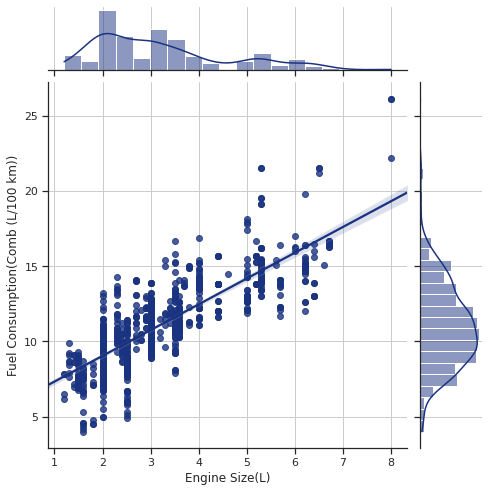

In [11]:
#Plotting the relationship between engine size and fuel consumption
sns.jointplot(data=df, x='Engine Size(L)', y='Fuel Consumption(Comb (L/100 km))', kind = 'reg', truncate = False, color = (0.1, 0.2, 0.5), height = 7)

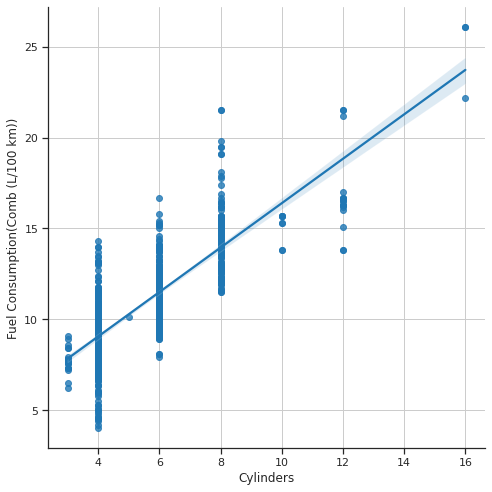

In [12]:
#Plotting the relationship between cylinders and fuel consumption
sns.lmplot(data=df, x='Cylinders', y='Fuel Consumption(Comb (L/100 km))', height = 7)

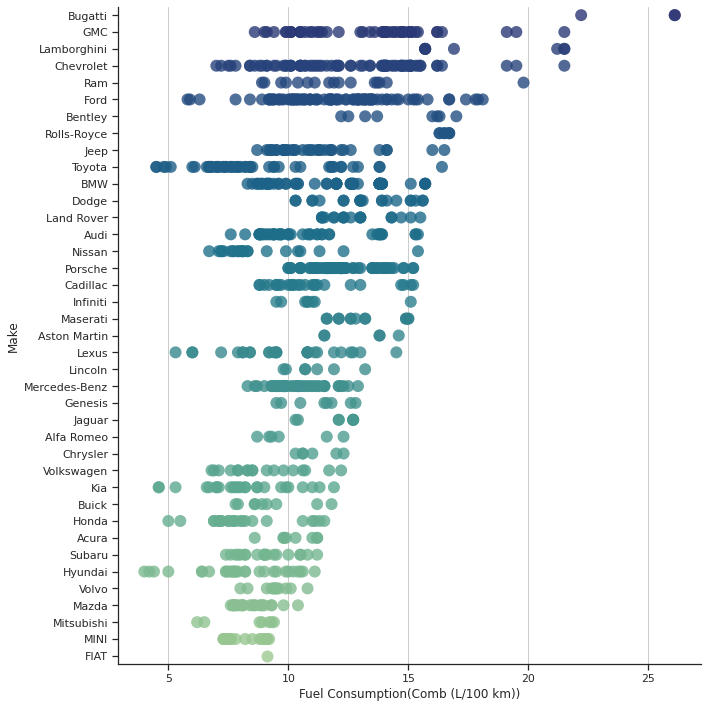

In [13]:
#Plotting fuel consumption per make, in descending order
sns.catplot(data= df.sort_values('Fuel Consumption(Comb (L/100 km))',ascending = False),x= 'Fuel Consumption(Comb (L/100 km))',y= 'Make', kind= 'strip',
            s=12,height=10, jitter= False, palette= "crest_r", edgecolor= 'w', alpha= 0.8)

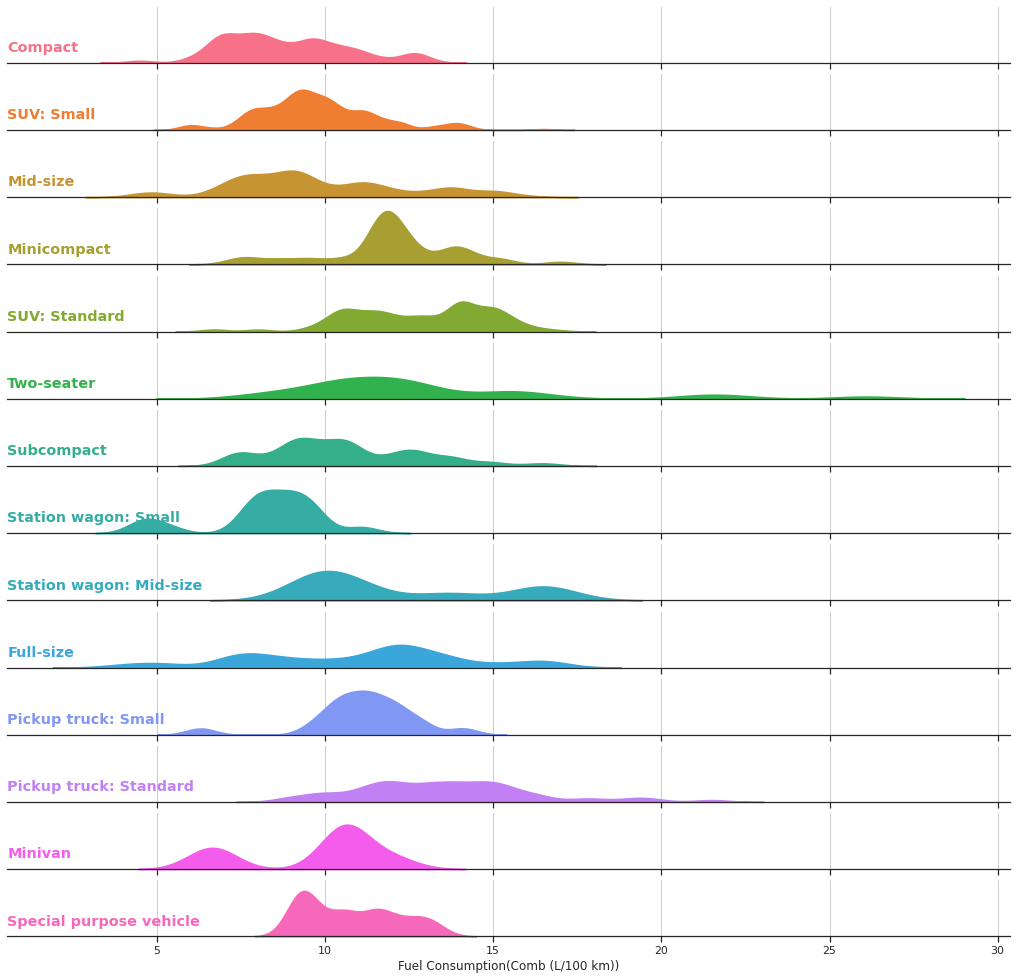

In [14]:
#Plotting fuel consumption per vehicle class
g = sns.FacetGrid(df, row='Vehicle Class', hue='Vehicle Class', aspect=15, height=1)

#Plotting aesthetics for each facet 
g.map(sns.kdeplot, 'Fuel Consumption(Comb (L/100 km))',
      bw_adjust=0.5, clip_on= False,
      fill=True, alpha=1, linewidth=1.5)

#Creating and applying function to apply proper labels to each plot
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .2, label, fontweight='bold', color=color, size = 'large',
            ha='left', transform=ax.transAxes)
    
g.map(label,'Vehicle Class')

#Aesthetic options for better plot readability
g.figure.subplots_adjust(hspace=0.2)
g.set_titles('')
g.set(yticks=[], ylabel='', xlabel='Fuel Consumption(Comb (L/100 km))')
g.despine(left=True)

### Pre-processing Data for Classification

In [15]:
#Features
X = df[['Vehicle Class','Transmission','Engine Size(L)','Cylinders','Fuel Type']]
#Target
y = df['Fuel Consumption(Comb (L/100 km))']

In [16]:
#Looking at target's distribution.
y.describe()

count    946.000000
mean      11.092072
std        2.876276
min        4.000000
25%        9.100000
50%       10.800000
75%       12.900000
max       26.100000
Name: Fuel Consumption(Comb (L/100 km)), dtype: float64

In [17]:
#Creating a function to create dummy variables
def dummy_df(dframe, todummy_list):
    for x in todummy_list:
        dummies = pd.get_dummies(dframe[x], prefix=x) 
        dframe = dframe.drop(x, 1)                    
        dframe = pd.concat([dframe, dummies], axis=1) 
    return dframe

dummy_list = X.loc[:, X.columns != 'Engine Size(L)']

X = dummy_df(X,dummy_list)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """


In [18]:
#Splitting the data into a training and test set. 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.15, random_state = 1234)

In [37]:
print(f'Training data: {X_train.shape}\nTesting Data:  {X_test.shape}')

Training data: (804, 50)
Testing Data:  (142, 50)


In [20]:
#Verifying how many features in the training set have 10 or less observations.
#Ideally, it is expected to have 8-10 observations per feature on the training set.
#Globally, this dataset meets this criteria (804 > 50*10).
#However, some individual features may fall below this criteria.
count=0
for col in X_train.columns:
  if(sum(X_train[col])<=10):
    print(f'{col} has {sum(X_train[col])} observations')
    count +=1
print(f'\nOut of {len(X_train.columns)} features, {count} of them have 10 or fewer observations.')

Vehicle Class_Minivan has 5 observations
Vehicle Class_Station wagon: Mid-size has 8 observations
Transmission_A7 has 1 observations
Transmission_AM6 has 9 observations
Transmission_AS5 has 2 observations
Transmission_AS7 has 5 observations
Transmission_AV1 has 4 observations
Transmission_AV10 has 8 observations
Transmission_AV6 has 7 observations
Transmission_AV7 has 8 observations
Transmission_M5 has 5 observations
Cylinders_5 has 1 observations
Cylinders_10 has 7 observations
Cylinders_16 has 3 observations
Fuel Type_E has 10 observations

Out of 50 features, 15 of them have 10 or fewer observations.


## Predicting Fuel Consumption - Linear Regression


### Creating Model

In [21]:
#Linear regression is a simple model that is easy to interpret and understand.
#The number of features with few observations listed above is likely to hinder performance.
#Removing features is not considered here since only 5 features are used to predict fuel consumption.
#Ideally, we would add more data (previous years?) to combat this.
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(X_test)

### Interpreting Model

In [23]:
lr_coeffs = pd.DataFrame(lr.coef_, X.columns,columns=['Coefficient']).sort_values(by='Coefficient',ascending=False)
print(f'Intercept: {lr.intercept_}')
lr_coeffs

Intercept: 11.404382233561158


,Coefficient
Cylinders_16,9.079964
Fuel Type_E,3.039548
Transmission_AS5,2.070116
Transmission_M7,1.882820
Cylinders_12,1.814493
Transmission_A6,1.555292
Vehicle Class_Special purpose vehicle,1.203999
Transmission_AM8,1.099563
Vehicle Class_Pickup truck: Small,0.977023
Transmission_AS10,0.910553


### Evaluating Model

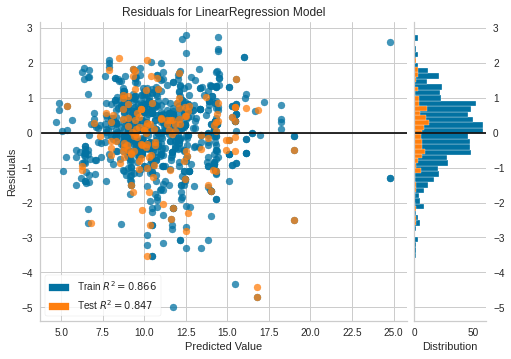

In [24]:
#Plotting residuals on training and test set.
#This linear regression model explains 86.6% (r2) of the variance of combined fuel consumption (L/100km) on the training set and 84.7% on the test set.
#There seems to be quite a few over-estimates outliers (residuals <= -3).
from yellowbrick.regressor import ResidualsPlot
lr_resplot = ResidualsPlot(lr,test_color = 'tab:orange')

lr_resplot.fit(X_train, y_train)  
lr_resplot.score(X_test, y_test)  
lr_resplot.show()                 

KstestResult(statistic=0.043942645404919545, pvalue=0.08701327925088298)


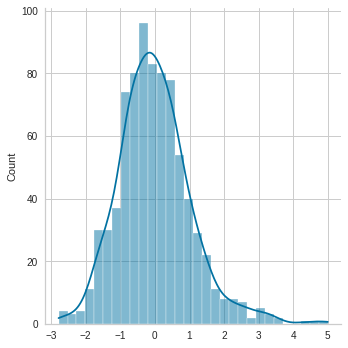

In [36]:
from scipy.stats import kstest

#Predicting on training set and creating a residuals variable
y_pred_train = lr.predict(X_train)
lr_res = y_train.values-y_pred_train

#Plotting residuals
sns.displot(lr_res,kde=True)

#With a p-value of 0.08 > 0.05, the null hypothesis of normality is not rejected.
#Residuals are therefore considered to have a normal distribution. 
print(kstest(lr_res,'norm'))

In [26]:
#Calculating performance measures on both training and test set, to verify if model has good generalization.
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

train_lr_MAE = mean_absolute_error(y_train,y_pred_train)
train_lr_MAPE = mean_absolute_percentage_error(y_train,y_pred_train)*100

test_lr_MAE = mean_absolute_error(y_test,y_pred)
test_lr_MAPE = mean_absolute_percentage_error(y_test,y_pred)*100


#Considering the small amount of features used, performance is decent. 
#The performance loss between training and test set is minimal, indicating good generalization.
print(f"{'Training set ---->':<20} MAE:{train_lr_MAE:.6f} MAPE:{train_lr_MAPE:.6f}%")
print(f"{'Test set -------->':<20} MAE:{test_lr_MAE:.6f} MAPE:{test_lr_MAPE:.6f}%")

Training set ---->   MAE:0.790689 MAPE:7.494411%
Test set -------->   MAE:0.846701 MAPE:7.728851%


## Predicting Fuel Consumption - Auto ML
### Trying to improve performance using auto-sklearn!

### Creating Model

In [27]:
#Required for Google Colab, necessary to pip install and reset runtime on every notebook opening
#!pip install auto-sklearn

In [28]:
import autosklearn.regression

auto_regressor = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=240,
    per_run_time_limit=60,
    #Excluding gaussian process and ard regression due to very lengthy runtimes 
    exclude = {'regressor': ['gaussian_process','ard_regression']}
)

In [29]:
auto_regressor.fit(X_train,y_train)

AutoSklearnRegressor(exclude={'regressor': ['gaussian_process',
                                            'ard_regression']},
                     per_run_time_limit=60, time_left_for_this_task=240)

In [30]:
auto_pred = auto_regressor.predict(X_test)

### Interpreting Model

In [31]:
auto_regressor.leaderboard().sort_values(by = 'ensemble_weight',ascending=False)

,rank,ensemble_weight,type,cost,duration
model_id,,,,,
12,3,0.36,extra_trees,0.137498,2.111870
3,1,0.24,gradient_boosting,0.135692,6.005957
5,6,0.16,extra_trees,0.158243,12.385521
17,4,0.12,gradient_boosting,0.148865,4.444986
15,5,0.10,libsvm_svr,0.149884,0.714639
8,2,0.02,extra_trees,0.135841,1.642967


### Evaluating Model

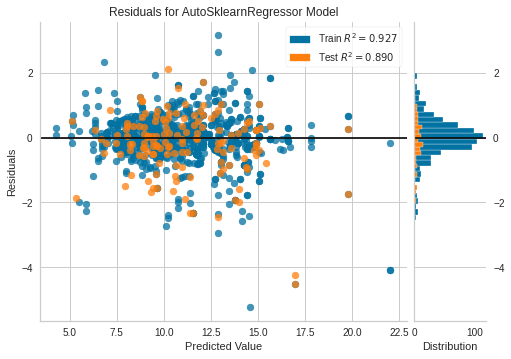

In [32]:
#This ensemble model explains 92.7% (r2) of the variaton of combined fuel consumption (L/100km) on the training set and 89.0% on the test set.
#R2 is improved compared to the linear regression model.
#The residuals plot also shows much less outliers (only 2 on each set) and residuals are more centered around 0.
auto_resplot = ResidualsPlot(auto_regressor,test_color = 'tab:orange')

auto_resplot.fit(X_train, y_train)  
auto_resplot.score(X_test, y_test)  
auto_resplot.show()                 

KstestResult(statistic=0.15050785261993171, pvalue=2.299402112927838e-16)


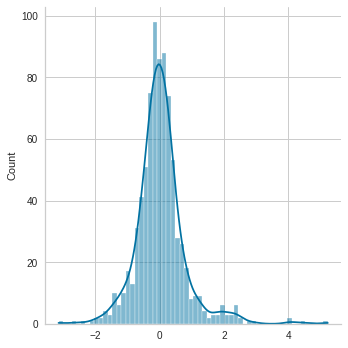

In [35]:
#Predicting on training set and creating a residuals variable
auto_pred_train = auto_regressor.predict(X_train)
auto_res = y_train.values-auto_pred_train

#Plotting residuals
sns.displot(auto_res,kde=True)

#With a p-value nearing zero, the null hypothesis of normality rejected by the K-S test.
#However, plot shows a good residual distribution. The higher r2 and residuals plot hint at a better model than linear regression.
print(kstest(auto_res,'norm'))

In [34]:
#Calculating performance measures on both training and test set, to verify if model has good generalization.
train_auto_MAE = mean_absolute_error(y_train,auto_pred_train)
train_auto_MAPE = mean_absolute_percentage_error(y_train,auto_pred_train)*100

test_auto_MAE = mean_absolute_error(y_test,auto_pred)
test_auto_MAPE = mean_absolute_percentage_error(y_test,auto_pred)*100

#As expected, the ensemble model has much better performance than simple linear regression.
#The model shows a roughly 1.4% increase in MAPE on the test set, which is a bigger loss than linear regression.
#However, model performance on both sets is remains improved.
print(f"{'Training set ---->':<20} MAE:{train_auto_MAE:.6f} MAPE:{train_auto_MAPE:.6f}%")
print(f"{'Test set -------->':<20} MAE:{test_auto_MAE:.6f} MAPE:{test_auto_MAPE:.6f}%")

Training set ---->   MAE:0.509549 MAPE:4.709760%
Test set -------->   MAE:0.700656 MAPE:6.173377%
